# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Aug  4 01:46:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0              31W /  70W |    111MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Image shape: (32, 32, 3)
Number of classes: 100
Text(0.5, 1.0, 'plates')
19 lbls[i][0]
[19]
Text(0.5, 1.0, 'television')
29 lbls[i][0]
[29]
Text(0.5, 1.0, 'beaver')
0 lbls[i][0]
[0]
Text(0.5, 1.0, 'poppies')
11 lbls[i][0]
[11]
Text(0.5, 1.0, 'dolphin')
1 lbls[i][0]
[1]


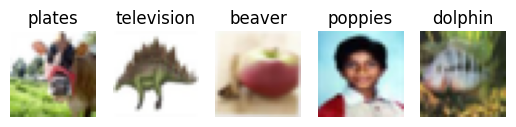

In [5]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Examine the shapes of the datasets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Determine the dimensions of the images
image_shape = x_train.shape[1:]
print("Image shape:", image_shape)

# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

def plt_examples (imgs, lbls, class_names, num_examples=5):
    plt.figure
    for i in range(num_examples):
        plt.subplot(1, num_examples, i+1)
        plt.imshow(imgs[i])
        print(plt.title(class_names[lbls[i][0]]))
        plt.title(class_names[lbls[i][0]])
        print(lbls[i][0], 'lbls[i][0]')
        print(lbls[i])
        plt.axis("off")
    plt.show()


class_names = ["beaver","dolphin","otter","seal","whale","aquarium fish","flatfish","ray","shark","trout","orchids","poppies","roses","sunflowers","tulips","bottles","bowls","cans","cups","plates","apples","mushrooms","oranges","pears","sweet peppers","clock","computer keyboard","lamp","telephone","television","bed","chair","couch","table","wardrobe","bee","beetle","butterfly","caterpillar","cockroach","bear","leopard","lion","tiger","wolf","bridge","castle","house","road","skyscraper","cloud","forest","mountain","plain","sea","camel","cattle","chimpanzee","elephant","kangaroo","fox","porcupine","possum","raccoon","skunk","crab","lobster","snail","spider","worm","baby","boy","girl","man","woman","crocodile","dinosaur","lizard","snake","turtle","hamster","mouse","rabbit","shrew","squirrel","maple","oak","palm","pine","willow","bicycle","bus","motorcycle","pickup truck","train","lawn-mower","rocket","streetcar","tank","tractor"]

plt_examples(x_train, y_train, class_names, 5)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Your code here

import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new sets to confirm
print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)
print("Test set shape:", x_test.shape, y_test.shape)


Training set shape: (40000, 32, 32, 3) (40000, 100)
Validation set shape: (10000, 32, 32, 3) (10000, 100)
Test set shape: (10000, 32, 32, 3) (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()

# 1 Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3 Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=100, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy is suitable for multi-class classification where the goal is to classify an input into one of many possible categories.
- <b>Optimizer:</b> Adam is efficient in terms of computation and memory requirements, and it typically converges faster

In [8]:
from keras import optimizers

# Compile the model
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Your code here

batch_size = 32
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Print the training history keys to check the recorded metrics
print(history.history.keys())

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0342 - loss: 4.3804 - val_accuracy: 0.1371 - val_loss: 3.7040
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1254 - loss: 3.7230 - val_accuracy: 0.1902 - val_loss: 3.3453
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1795 - loss: 3.3990 - val_accuracy: 0.2383 - val_loss: 3.1243
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2200 - loss: 3.1816 - val_accuracy: 0.2678 - val_loss: 2.9601
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2511 - loss: 3.0133 - val_accuracy: 0.2917 - val_loss: 2.8602
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2767 - loss: 2.9088 - val_accuracy: 0.2982 - val_loss: 2.7977
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2882 - loss: 2.8214 - val_accuracy: 0.3064 - val_loss: 2.7470
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3074 - loss: 2.7367 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.4530 indicating that the model correctly classified around 43.25% of the test images.
- <b>Other metric:</b> F1 Score  
- <b>Reason for selection:</b> F1 combines the precision (the accuracy of the positive predictions) and the recall (the ability to find all the positive instances).  Useful for evaluating performance of the model on imbalanced datasets
- <b>Value of metric:</b> 0.4320
- <b>Interpretation of metric value:</b> value indicates that the model's performance is consistent in identifying both positive and negative classes but still has room for improvement in

In [10]:
from sklearn.metrics import f1_score
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: {:.4f}".format(test_accuracy))

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("F1 Score: {:.4f}".format(f1))


Test Accuracy: 0.3616
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.3563


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

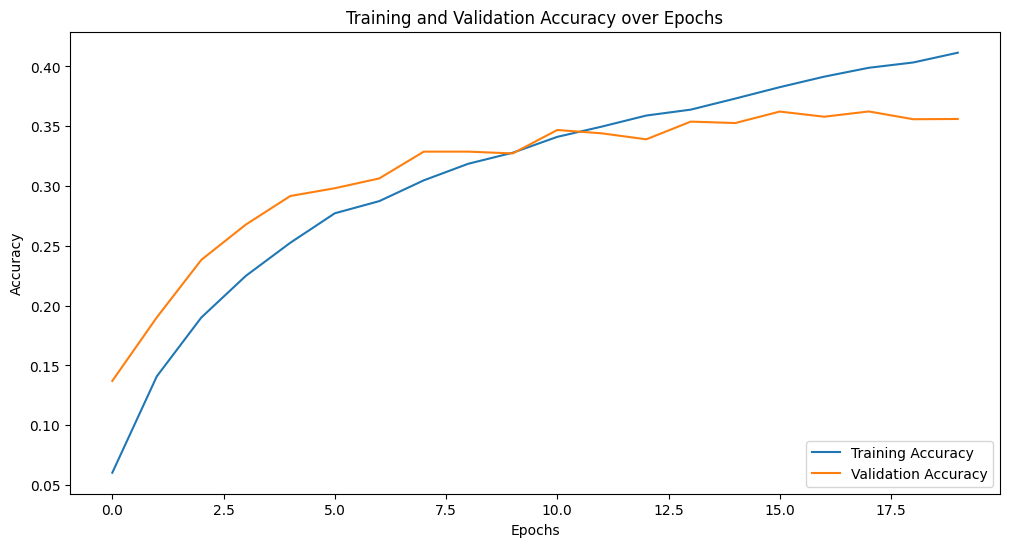

Number of correctly classified images: 3616
Number of incorrectly classified images: 6384
Correctly classified image:


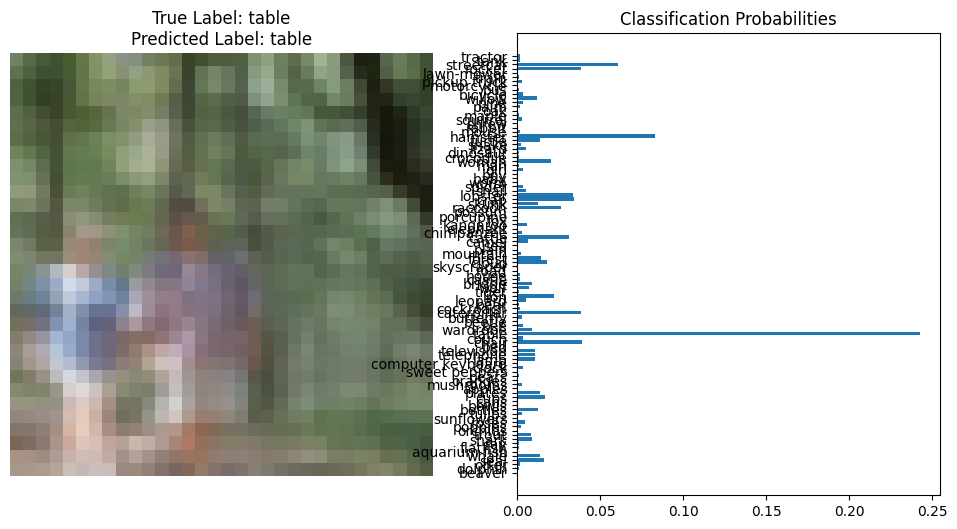

Incorrectly classified image:


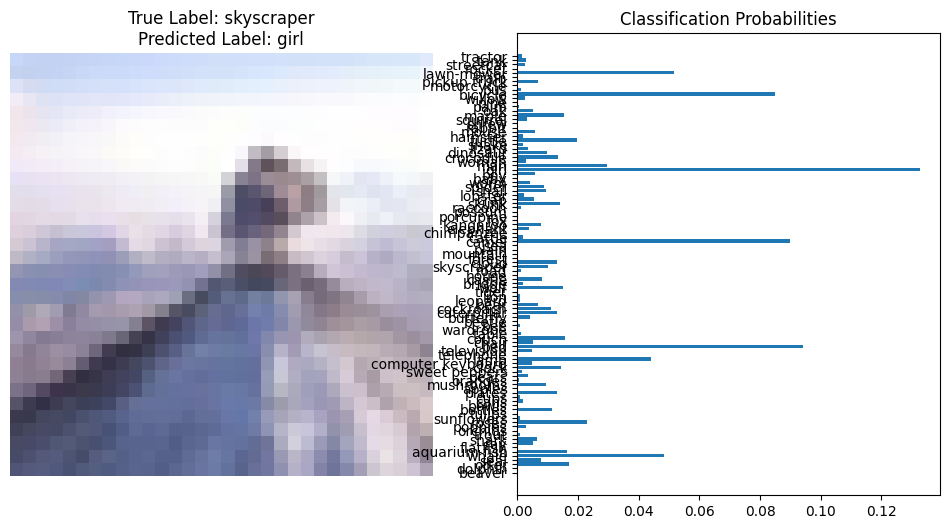

Number of class names: 100
Shape of y_pred for the first sample: (100,)


In [11]:
# Your code here
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Find the correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

print("Number of correctly classified images:", len(correct_indices))
print("Number of incorrectly classified images:", len(incorrect_indices))

# Select one correct and one incorrect classification
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

def plot_image_with_probabilities(index):
    plt.figure(figsize=(12, 6))

    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[index])
    plt.title(f"True Label: {class_names[y_true[index]]}\nPredicted Label: {class_names[y_pred_classes[index]]}")
    plt.axis('off')

    # Plot the probabilities
    plt.subplot(1, 2, 2)
    plt.barh(class_names, y_pred[index])
    plt.title("Classification Probabilities")
    plt.show()

# Plot correctly classified image
print("Correctly classified image:")
plot_image_with_probabilities(correct_idx)

# Plot incorrectly classified image
print("Incorrectly classified image:")
plot_image_with_probabilities(incorrect_idx)

# Check the shapes of class names and prediction probabilities
print("Number of class names:", len(class_names))
print("Shape of y_pred for the first sample:", y_pred[0].shape)


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [40]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Design the CNN architecture with Batch Normalization and Dropout
model = Sequential()

# 1 Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3 Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=100, activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

batch_size = 32
epochs = 20

# Train the enhanced model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    verbose=1)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_48               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_49               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 4, 4, 256)           │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_50               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 456,612 (1.74 MB)

 Trainable params: 455,908 (1.74 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0524 - loss: 4.4587 - val_accuracy: 0.1461 - val_loss: 3.5924
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1348 - loss: 3.7222 - val_accuracy: 0.1974 - val_loss: 3.3317
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1778 - loss: 3.4095 - val_accuracy: 0.2177 - val_loss: 3.1818
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2218 - loss: 3.1650 - val_accuracy: 0.2490 - val_loss: 3.0412
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2520 - loss: 2.9761 - val_accuracy: 0.3144 - val_loss: 2.7157
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2877 - loss: 2.8080 - val_accuracy: 0.3010 - val_loss: 2.8223
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3147 - loss: 2.6829 - val_accuracy: 0.3188 - val_loss: 2.7056
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3426 - loss: 2.5459 -

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [44]:
# Re-train
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: {:.4f}".format(test_accuracy))

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred_classes, average='weighted')
print("F1 Score: {:.4f}".format(f1))



Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5743 - loss: 1.4513 - val_accuracy: 0.4066 - val_loss: 2.5676
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5969 - loss: 1.3853 - val_accuracy: 0.4093 - val_loss: 2.5061
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6012 - loss: 1.3483 - val_accuracy: 0.4188 - val_loss: 2.5233
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6148 - loss: 1.3007 - val_accuracy: 0.4202 - val_loss: 2.5369
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6269 - loss: 1.2506 - val_accuracy: 0.4095 - val_loss: 2.6462
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6389 - loss: 1.2062 - val_accuracy: 0.4212 - val_loss: 2.5792
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6349 - loss: 1.2006 - val_accuracy: 0.4138 - val_loss: 2.6989
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6573 - loss: 1.1400 - 

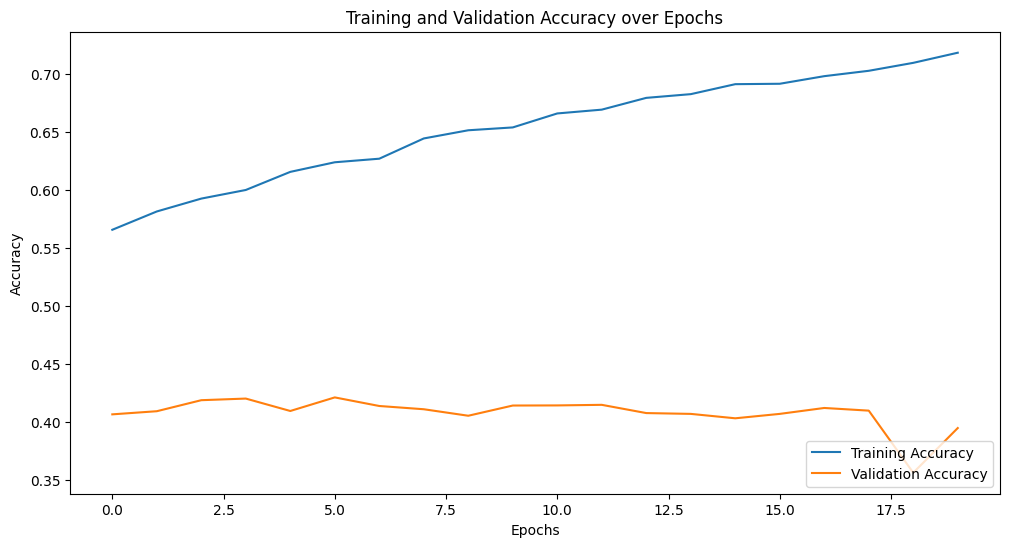

In [45]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


Correctly classified image:


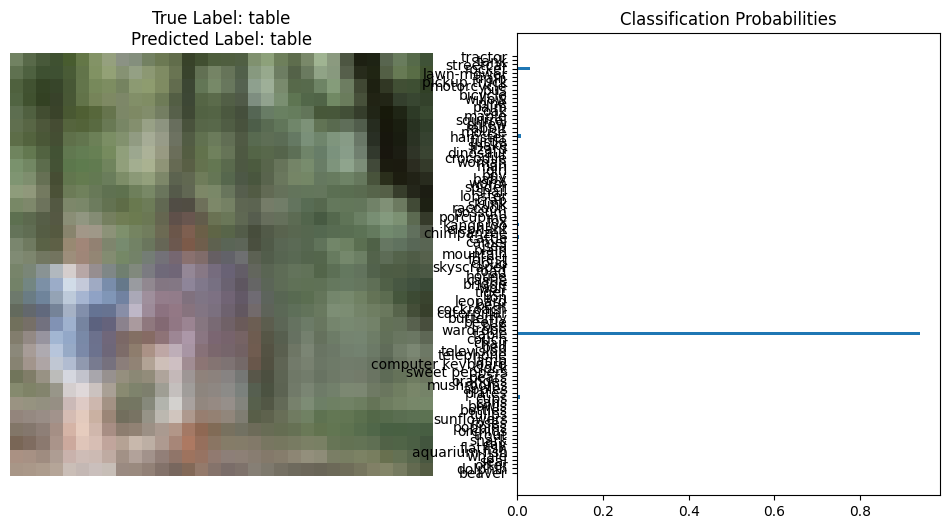

Incorrectly classified image:


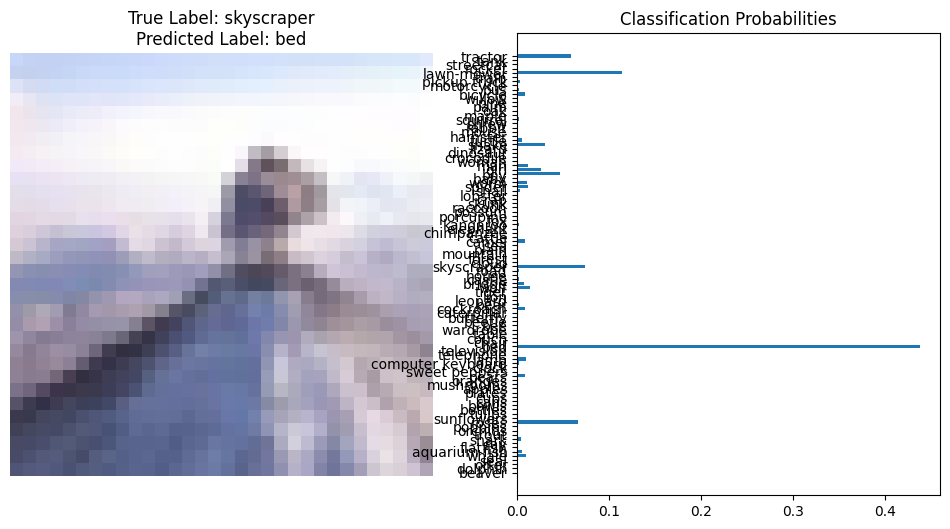

In [46]:
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

def plot_image_with_probabilities(index):
    plt.figure(figsize=(12, 6))

    # Plot image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[index])
    plt.title(f"True Label: {class_names[y_true[index]]}\nPredicted Label: {class_names[y_pred_classes[index]]}")
    plt.axis('off')

    # Plot probabiliti
    plt.subplot(1, 2, 2)
    plt.barh(class_names, y_pred[index])
    plt.title("Classification Probabilities")
    plt.show()

# Plot correct image
print("Correctly classified image:")
plot_image_with_probabilities(correct_idx)

# Plot incorrect image
print("Incorrectly classified image:")
plot_image_with_probabilities(incorrect_idx)


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

**Did the model's performance improve?**
The model performance has improvement in training accuracy, reaching up to 72.97%, but the validation accuracy remained relatively low and even declined over the epochs. The final test accuracy was 40.55%, with an F1 score of 0.4060.

**Why do you think this is?**
The the couses of performance issues could be overfitting. The training accuracy increased, but the validation accuracy did not improve relatively, it indicates that the model learned to fit the training data well but failed to generalize to unseen data. The complexity of the model may be too high and lead to overfitting.

**Do you think there is room for further improvement? Why or why not?**
 The gap between training and validation accuracy suggests that regularization techniques, such as dropout, data augmentation, or more sophisticated architectures like ResNet, could be tried. Also worht to play with hyperparameters and maybe use early stopping to prevent overfitting might improve the model's generalization.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.